In [2]:
# Load Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Load the dataset.
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [16]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [21]:
# Define Labels 
labels=["Ankle boot","T-shirt/top","Dress","Sneaker","Pullover","Sandal","Bag","Coat"]

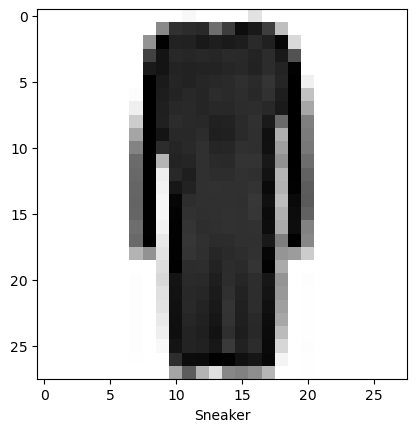

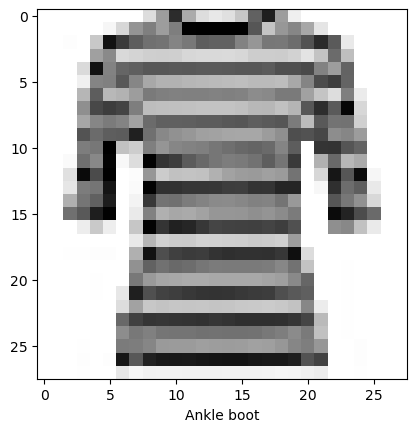

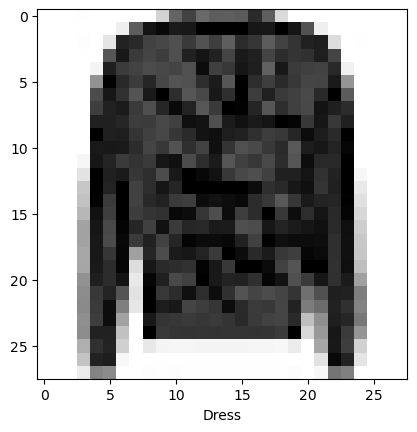

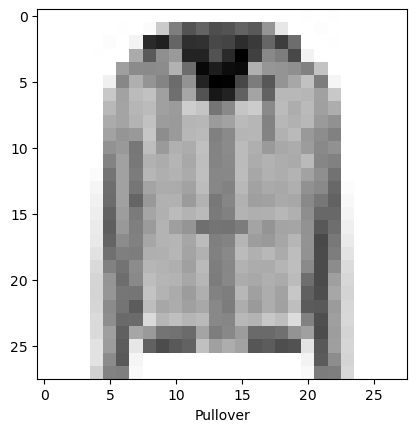

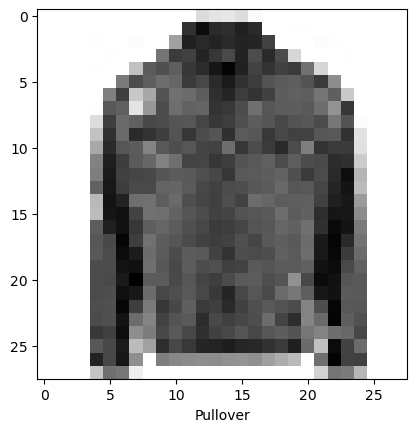

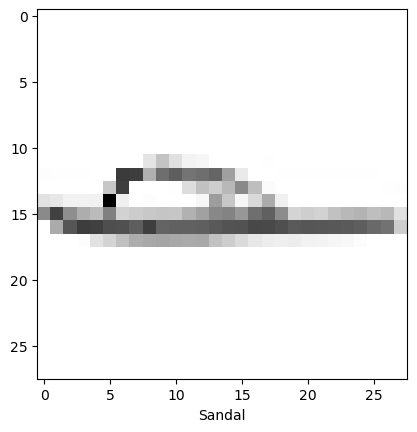

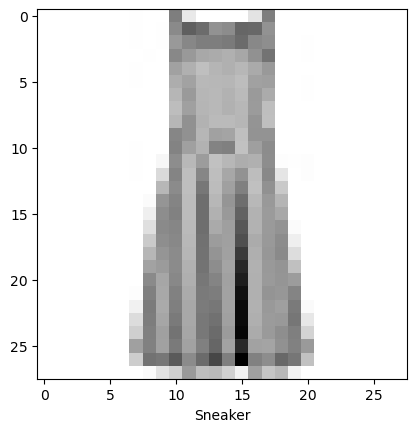

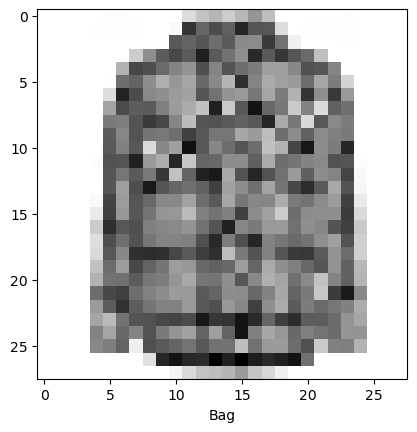

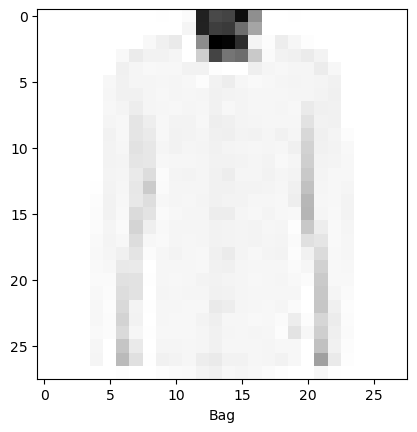

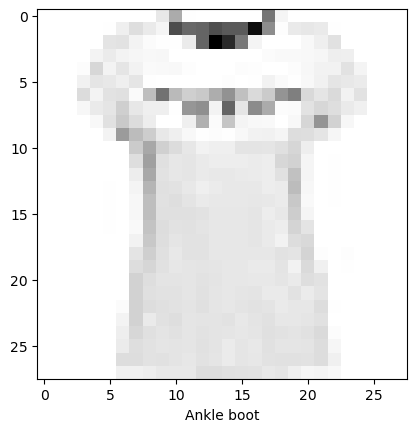

In [22]:
for i in range(25,35):
    plt.imshow(x_train[i],cmap="Greys")
    plt.xlabel(labels[int(y_train[i])])
    plt.show()

In [23]:
# We havw to convert 28x28 into 28x28x1
x_train= x_train.reshape(x_train.shape[0],28,28,1)

In [24]:
x_train.shape

(60000, 28, 28, 1)

In [25]:
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [26]:
x_test.shape

(10000, 28, 28, 1)

In [27]:
# Normalise the image
x_train= x_train/255
x_test= x_test/255
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [28]:
# One hot encoding on Y
print(y_test)
print(y_train)

[9 2 1 ... 8 1 5]
[9 0 0 ... 3 0 5]


In [29]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [30]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [31]:
pd.set_option("display.max_columns",None)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##CNN Model

In [32]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [43]:
model= Sequential()

In [44]:
model.add(Conv2D(32,(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
hist=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.7433 - loss: 0.7282 - val_accuracy: 0.8427 - val_loss: 0.4291
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.8741 - loss: 0.3427 - val_accuracy: 0.8822 - val_loss: 0.3253
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.8950 - loss: 0.2878 - val_accuracy: 0.8942 - val_loss: 0.2886
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9086 - loss: 0.2457 - val_accuracy: 0.8957 - val_loss: 0.2783
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9201 - loss: 0.2194 - val_accuracy: 0.8892 - val_loss: 0.3026
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9300 - loss: 0.1913 - val_accuracy: 0.9103 - val_loss: 0.2449
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9324 - loss: 0.1828 - val_accuracy: 0.9103 - val_loss: 0.2513
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9391 - loss: 0.1626 - 

In [46]:
model_json= model.to_json()

In [47]:
model_json

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_2", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 28, 28, 1], "dtype": "float32", "sparse": false, "name": "input_layer_2"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_4", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.ini

In [48]:
y_pred= model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [49]:
y_pred

array([[3.77586462e-21, 2.05693121e-21, 1.54437532e-16, ...,
        1.26521515e-09, 4.14671756e-16, 1.00000000e+00],
       [8.99132921e-11, 5.14418437e-23, 1.00000000e+00, ...,
        7.62523213e-17, 4.74047281e-23, 2.08036049e-13],
       [9.94849209e-14, 1.00000000e+00, 8.39811111e-21, ...,
        4.37259190e-25, 9.04578158e-20, 1.21747045e-27],
       ...,
       [5.72940762e-17, 1.27633029e-21, 4.54147236e-17, ...,
        1.26944737e-17, 1.00000000e+00, 2.61527080e-17],
       [5.85022482e-14, 1.00000000e+00, 7.73524318e-17, ...,
        2.01080821e-21, 2.32629287e-16, 5.40216614e-19],
       [1.48809003e-11, 3.97647644e-11, 1.53953361e-09, ...,
        2.74562580e-03, 1.10697161e-04, 4.88308672e-07]], dtype=float32)

In [50]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [51]:
y_pred_labels

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 7,
 3,
 4,
 1,
 2,
 4,
 8,
 0,
 2,
 7,
 7,
 5,
 1,
 6,
 6,
 6,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 6,
 1,
 6,
 9,
 6,
 7,
 2,
 1,
 6,
 6,
 4,
 4,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 6,
 4,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 2,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 6,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 6,
 0,
 0,
 1,
 6,
 1,
 6,
 2,
 2,
 3,
 4,
 1,
 4,
 5,
 6,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 4,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 6,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 4,
 5,
 6,
 9,
 2,
 2,
 8,
 6,
 4,
 6,
 2,


In [ ]:
y_test=[np.argmax(i) for i in y_test]

In [58]:
print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1000
           1       0.99      0.98      0.99      1000
           2       0.90      0.80      0.85      1000
           3       0.92      0.89      0.91      1000
           4       0.84      0.88      0.86      1000
           5       0.99      0.96      0.98      1000
           6       0.61      0.83      0.71      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.94      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.91      0.89      0.90     10000
weighted avg       0.91      0.89      0.90     10000



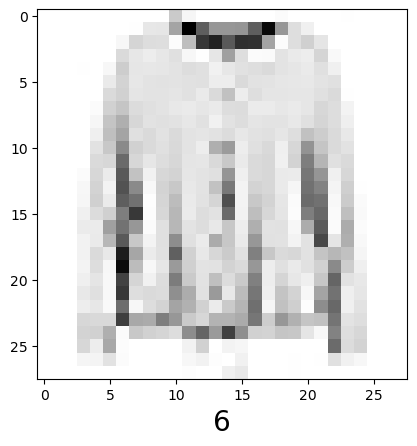

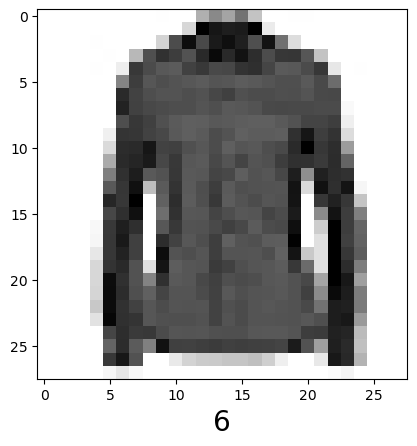

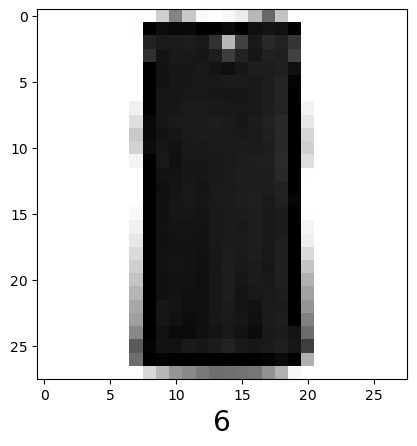

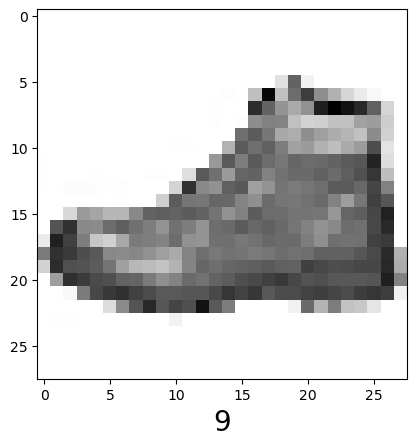

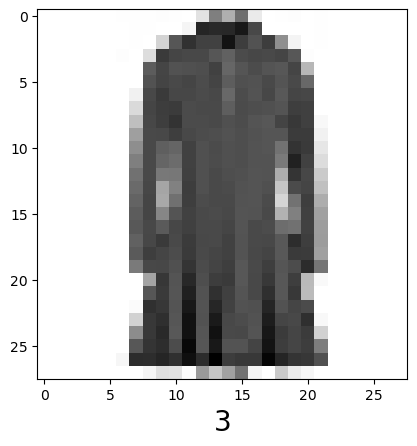

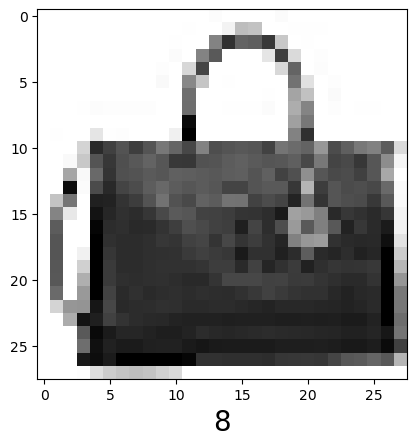

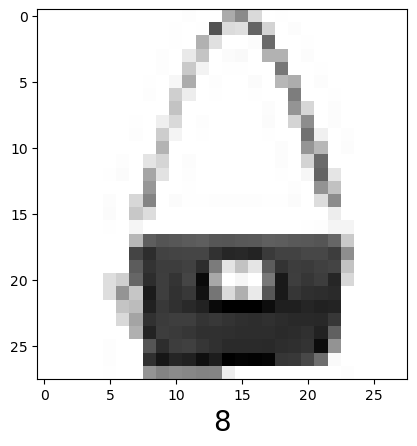

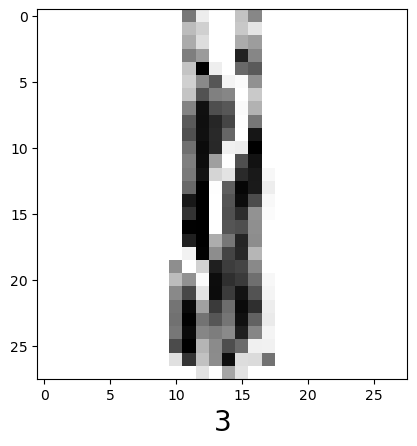

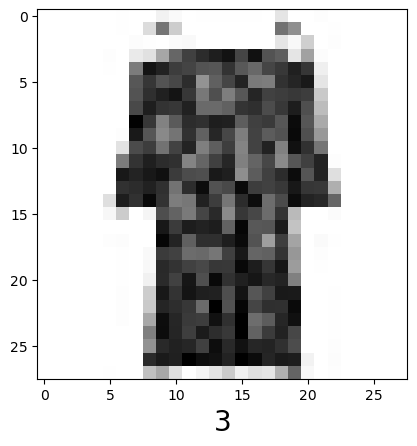

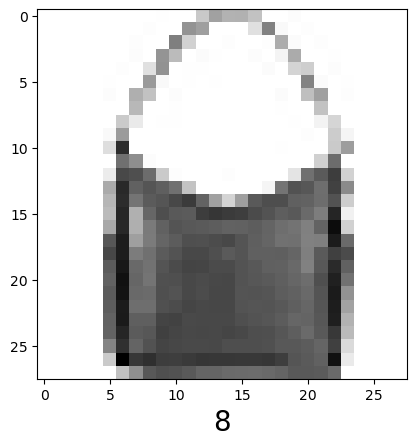

In [59]:
for i in range(25,35):
    plt.imshow(x_test[i],cmap="Greys")
    plt.xlabel(labelsy_pred_labels[i],fontsize=20)
    plt.show()